In [ ]:
import pandas as pd
titanic_url = 'https://github.com/sehakflower/data/blob/main/titanic_1309.xlsx?raw=true'
titanic=pd.read_excel(titanic_url, sheet_name='total')
titanic_df=titanic.drop(['body', 'home.dest'], axis=1)
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


In [12]:
titanic_df['age_cat'] = pd.cut(titanic_df['age'], bins=[0, 3, 7, 15, 30, 60, 100], include_lowest=True, labels=['baby', 'children', 'teenage', 'young', 'adult', 'old'])
titanic_df.groupby('age_cat').mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7884\291588795.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic_df.groupby('age_cat').mean()


TypeError: agg function failed [how->mean,dtype->object]

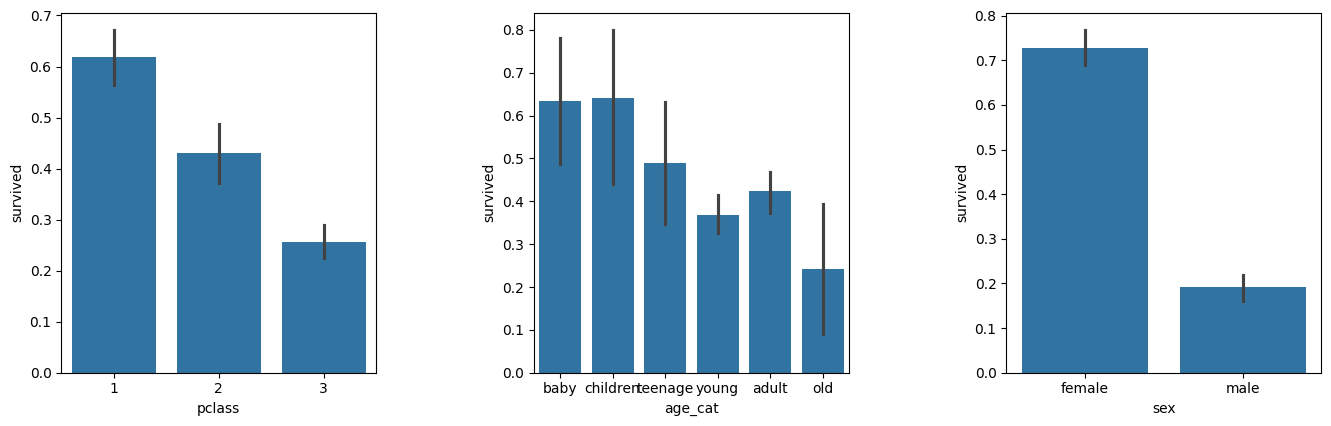

In [7]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

data = titanic_df
plt.figure(figsize=[14, 4])
plt.subplot(131)
sns.barplot(x = 'pclass', y = 'survived', data = titanic_df)
plt.subplot(132)
sns.barplot(x = 'age_cat', y = 'survived', data = titanic_df)
plt.subplot(133)
sns.barplot(x = 'sex', y = 'survived', data = titanic_df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

In [8]:
titanic_df.groupby(['pclass', 'sex']).mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
boat_survivors = titanic_df[titanic_df['boat'].notnull()]
nboat_survivors = titanic_df[titanic_df['boat'].isnull()]
print(boat_survivors.groupby('sex')['survived'].mean())
print(nboat_survivors.groupby('sex')['survived'].mean())

NameError: name 'titanic_df' is not defined

In [10]:
f, ax = plt.Subplots(1, 2, figsize=(12, 6))
boat_survivors['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.2f%%',ax = ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x = 'survived', data = boat_survivors, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'Subplots'

In [11]:
conversion_special = lambda x: x.split(',')[1].split('.')[0].strip()
titanic_df['title'] = titanic_df['name'].map(conversion_special)
titanic_df['title'] = titanic_df['title'].replace('Mlle','Miss')
titanic_df['title'] = titanic_df['title'].replace('Ms','Miss')
titanic_df['title'] = titanic_df['title'].replace('Mnme','Mrs')
Special = ['Lady', 'the Countess', 'Countess', 'Capt', 'Master', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
for each in Special :
    titanic_df['title'] = titanic_df['title'].replace(each, 'Special')
    print(titanic_df[['title', 'survived']].groupby(['title'], as_index=False).mean())

           title  survived
0           Capt  0.000000
1            Col  0.500000
2            Don  0.000000
3           Dona  1.000000
4             Dr  0.500000
5       Jonkheer  0.000000
6          Major  0.500000
7         Master  0.508197
8           Miss  0.678030
9            Mme  1.000000
10            Mr  0.162483
11           Mrs  0.786802
12           Rev  0.000000
13           Sir  1.000000
14       Special  1.000000
15  the Countess  1.000000
       title  survived
0       Capt  0.000000
1        Col  0.500000
2        Don  0.000000
3       Dona  1.000000
4         Dr  0.500000
5   Jonkheer  0.000000
6      Major  0.500000
7     Master  0.508197
8       Miss  0.678030
9        Mme  1.000000
10        Mr  0.162483
11       Mrs  0.786802
12       Rev  0.000000
13       Sir  1.000000
14   Special  1.000000
       title  survived
0       Capt  0.000000
1        Col  0.500000
2        Don  0.000000
3       Dona  1.000000
4         Dr  0.500000
5   Jonkheer  0.000000
6      Major